In [52]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")


In [53]:
U5MR_age = spark.read.csv('U5MR_age.csv', header=True, inferSchema=True)
LifeExpectancyData = spark.read.csv('LifeExpectancyData.csv', header=True, inferSchema=True)

In [54]:
import pandas as pd

U5MR_excel = pd.read_excel('U5MR.xlsx')

U5MR = spark.createDataFrame(U5MR_excel)

In [55]:
U5MR_gender_excel = pd.read_excel('U5MR_Gender.xlsx')
U5MR_gender = spark.createDataFrame(U5MR_gender_excel)

In [56]:
# 2.2 describe data

columns = LifeExpectancyData.columns

# first 6 columns
LifeExpectancyData.select(columns[:6]).show()
# last 6 columns
LifeExpectancyData.select(columns[-6:]).show()

+-----------+----+----------+-----------+---------------+-------------+
|    Country|Year|    Status|Life_expect|Adult_Mortality|infant_deaths|
+-----------+----+----------+-----------+---------------+-------------+
|Afghanistan|2015|Developing|       65.0|            263|           62|
|Afghanistan|2014|Developing|       59.9|            271|           64|
|Afghanistan|2013|Developing|       59.9|            268|           66|
|Afghanistan|2012|Developing|       59.5|            272|           69|
|Afghanistan|2011|Developing|       59.2|            275|           71|
|Afghanistan|2010|Developing|       58.8|            279|           74|
|Afghanistan|2009|Developing|       58.6|            281|           77|
|Afghanistan|2008|Developing|       58.1|            287|           80|
|Afghanistan|2007|Developing|       57.5|            295|           82|
|Afghanistan|2006|Developing|       57.3|            295|           84|
|Afghanistan|2005|Developing|       57.3|            291|       

In [57]:
columns = LifeExpectancyData.columns
# first 6 columns
LifeExpectancyData.select(columns[:6]).describe().show()
# last 6 columns
LifeExpectancyData.select(columns[-6:]).describe().show()

+-------+-----------+------------------+----------+-----------------+------------------+------------------+
|summary|    Country|              Year|    Status|      Life_expect|   Adult_Mortality|     infant_deaths|
+-------+-----------+------------------+----------+-----------------+------------------+------------------+
|  count|       2938|              2938|      2938|             2928|              2928|              2938|
|   mean|       null|2007.5187202178352|      null|69.22493169398912|164.79644808743168|30.303948264125257|
| stddev|       null| 4.613840940258099|      null|9.523867487824305| 124.2920790034219|117.92650131339906|
|    min|Afghanistan|              2000| Developed|             36.3|                 1|                 0|
|    max|   Zimbabwe|              2015|Developing|             89.0|               723|              1800|
+-------+-----------+------------------+----------+-----------------+------------------+------------------+

+-------+------------------

In [58]:
U5MR.show()

+-----------+----+-----------------------------------------------+
|     Entity|Year|Mortality rate, under-5 (per 1,000 live births)|
+-----------+----+-----------------------------------------------+
|Afghanistan|1960|                               35.8200012207031|
|Afghanistan|1961|                               35.2200012207031|
|Afghanistan|1962|                               34.6299987792968|
|Afghanistan|1963|                               34.0600006103515|
|Afghanistan|1964|                               33.5100006103515|
|Afghanistan|1965|                               32.9799987792968|
|Afghanistan|1966|                               32.4399993896484|
|Afghanistan|1967|                               31.8799987792968|
|Afghanistan|1968|                               31.3299987792968|
|Afghanistan|1969|                               30.7899993896484|
|Afghanistan|1970|                               30.2100006103515|
|Afghanistan|1971|                               29.6600006103

In [59]:
U5MR.describe().show()

+-------+-----------+------------------+-----------------------------------------------+
|summary|     Entity|              Year|Mortality rate, under-5 (per 1,000 live births)|
+-------+-----------+------------------+-----------------------------------------------+
|  count|      11226|             11226|                                          11226|
|   mean|       null|1992.5762515588813|                              7.474313033865287|
| stddev|       null|16.888760191812047|                              7.675478166875815|
|    min|Afghanistan|              1960|                              0.179999995231628|
|    max|   Zimbabwe|              2020|                               42.9700012207031|
+-------+-----------+------------------+-----------------------------------------------+



In [60]:
U5MR_gender.show()

+------+-----------+----+------+-----------------------+----------------+--------------+
|Number|    Country|Year|Gender|Child Mortality(1 to 4)|Total Population|Mortality Rate|
+------+-----------+----+------+-----------------------+----------------+--------------+
|     0|Afghanistan|1967|Female|                  26012|        5080.813|   5.119653095|
|     1|Afghanistan|1968|Female|                  26192|        5202.606|   5.034400068|
|     2|Afghanistan|1969|Female|                  26335|        5333.936|    4.93725459|
|     3|Afghanistan|1970|Female|                  26562|         5476.63|   4.850062904|
|     4|Afghanistan|1971|Female|                  26671|        5630.099|   4.737216877|
|     5|Afghanistan|1972|Female|                  26856|        5790.327|   4.638080026|
|     6|Afghanistan|1973|Female|                  26926|         5951.12|   4.524526476|
|     7|Afghanistan|1974|Female|                  26997|        6104.377|   4.422564334|
|     8|Afghanistan|1

In [61]:
U5MR_gender.describe().show()

+-------+-----------------+-----------+------------------+------+-----------------------+----------------+--------------+
|summary|           Number|    Country|              Year|Gender|Child Mortality(1 to 4)|Total Population|Mortality Rate|
+-------+-----------------+-----------+------------------+------+-----------------------+----------------+--------------+
|  count|            30940|      30940|             30940| 30940|                  30940|           30940|         30940|
|   mean|          15469.5|       null| 1991.456561085973|  null|     12727.220426632191|             NaN|           NaN|
| stddev|8931.753000764556|       null|17.323382195947257|  null|      63702.83959981849|             NaN|           NaN|
|    min|                0|Afghanistan|              1955|Female|                      0|           1.606|           0.0|
|    max|            30939|   Zimbabwe|              2019| Total|                1463821|             NaN|           NaN|
+-------+---------------

In [62]:
U5MR_age.show()

+--------------------+----+----+----------------+----+------------+
|              Entity|Code|Year|        AgeGroup| _c4|Death_Counts|
+--------------------+----+----+----------------+----+------------+
|         Afghanistan| AFG|2000|Age: 28-364 days|null|       47666|
|         Afghanistan| AFG|2001|Age: 28-364 days|null|       47102|
|         Afghanistan| AFG|2002|Age: 28-364 days|null|       47126|
|         Afghanistan| AFG|2003|Age: 28-364 days|null|       46204|
|         Afghanistan| AFG|2004|Age: 28-364 days|null|       45106|
|         Afghanistan| AFG|2005|Age: 28-364 days|null|       43768|
|         Afghanistan| AFG|2006|Age: 28-364 days|null|       41967|
|         Afghanistan| AFG|2007|Age: 28-364 days|null|       39903|
|         Afghanistan| AFG|2008|Age: 28-364 days|null|       38488|
|         Afghanistan| AFG|2009|Age: 28-364 days|null|       37114|
|         Afghanistan| AFG|2010|Age: 28-364 days|null|       36001|
|         Afghanistan| AFG|2011|Age: 28-364 days

In [63]:
U5MR_age.describe().show()

+-------+-----------+-----+------------------+-------------+----+------------------+
|summary|     Entity| Code|              Year|     AgeGroup| _c4|      Death_Counts|
+-------+-----------+-----+------------------+-------------+----+------------------+
|  count|      14592|13088|             14560|        14560|   0|             14560|
|   mean|       null| null|2007.5010989010989|         null|null| 46162.28756868132|
| stddev|       null| null| 4.609930408433627|         null|null|209412.14289433628|
|    min|Afghanistan|  AFG|              2000|Age: 0-6 days|null|                 0|
|    max|   Zimbabwe|  ZWE|              2015| Age:7-27Days|null|           2966641|
+-------+-----------+-----+------------------+-------------+----+------------------+



In [64]:

from pyspark.sql.functions import col, isnan, when, count
LifeExpectancyData.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in LifeExpectancyData.columns]).show()


+-------+----+------+-----------+---------------+-------------+-------+----------------------+----------+-------+---+-----------------+-----+-----------------+----------+--------+---+----------+-------------------+------------------+-------------------------------+---------+
|Country|Year|Status|Life_expect|Adult_Mortality|infant_deaths|Alcohol|percentage_expenditure|HepatitisB|Measles|BMI|under_five_deaths|Polio|Total_expenditure|Diphtheria|HIV_AIDS|GDP|Population|thinness_1-19_years|thinness_5-9_years|Income_composition_of_resources|Schooling|
+-------+----+------+-----------+---------------+-------------+-------+----------------------+----------+-------+---+-----------------+-----+-----------------+----------+--------+---+----------+-------------------+------------------+-------------------------------+---------+
|      0|   0|     0|         10|             10|            0|    194|                     0|       553|      0| 34|                0|   19|              226|        19|  

In [65]:

U5MR.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in U5MR.columns]).show()


+------+----+-----------------------------------------------+
|Entity|Year|Mortality rate, under-5 (per 1,000 live births)|
+------+----+-----------------------------------------------+
|     0|   0|                                              0|
+------+----+-----------------------------------------------+



In [66]:
U5MR_gender.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in U5MR_gender.columns]).show()

+------+-------+----+------+-----------------------+----------------+--------------+
|Number|Country|Year|Gender|Child Mortality(1 to 4)|Total Population|Mortality Rate|
+------+-------+----+------+-----------------------+----------------+--------------+
|     0|      0|   0|     0|                      0|             876|           876|
+------+-------+----+------+-----------------------+----------------+--------------+



In [67]:
U5MR_age.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in U5MR_age.columns]).show()

+------+----+----+--------+-----+------------+
|Entity|Code|Year|AgeGroup|  _c4|Death_Counts|
+------+----+----+--------+-----+------------+
|     0|1504|  32|      32|14592|          32|
+------+----+----+--------+-----+------------+



In [68]:
#03-DP
# select data
# Select Timeframe

In [69]:
LifeData = LifeExpectancyData.filter((col('Year') >= 2000) & (col('Year') <= 2015))
GenderData = U5MR_gender.filter((col('Year') >= 2000) & (col('Year') <= 2015))
MRData = U5MR.filter((col('Year') >= 2000) & (col('Year') <= 2015))
AgeData = U5MR_age.filter((col('Year') >= 2000) & (col('Year') <= 2015))

In [70]:
LifeData.show()
GenderData.show()
MRData.show()
AgeData.show()

+-----------+----+----------+-----------+---------------+-------------+-------+----------------------+----------+-------+----+-----------------+-----+-----------------+----------+--------+-----------+-----------+-------------------+------------------+-------------------------------+---------+
|    Country|Year|    Status|Life_expect|Adult_Mortality|infant_deaths|Alcohol|percentage_expenditure|HepatitisB|Measles| BMI|under_five_deaths|Polio|Total_expenditure|Diphtheria|HIV_AIDS|        GDP| Population|thinness_1-19_years|thinness_5-9_years|Income_composition_of_resources|Schooling|
+-----------+----+----------+-----------+---------------+-------------+-------+----------------------+----------+-------+----+-----------------+-----+-----------------+----------+--------+-----------+-----------+-------------------+------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|       65.0|            263|           62|   0.01|           71.27962362|        65|   11

+-----------+----+-----------------------------------------------+
|     Entity|Year|Mortality rate, under-5 (per 1,000 live births)|
+-----------+----+-----------------------------------------------+
|Afghanistan|2000|                               12.9199996948242|
|Afghanistan|2001|                               12.5199996948242|
|Afghanistan|2002|                               12.1099998474121|
|Afghanistan|2003|                               11.6900001525878|
|Afghanistan|2004|                               11.2599998474121|
|Afghanistan|2005|                               10.8400001525878|
|Afghanistan|2006|                               10.4099998474121|
|Afghanistan|2007|                               9.99000015258789|
|Afghanistan|2008|                               9.56999969482421|
|Afghanistan|2009|                               9.16999969482421|
|Afghanistan|2010|                               8.78000030517578|
|Afghanistan|2011|                                            

In [71]:

columns_to_drop = ['Adult_Mortality', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'Polio', 'Total_expenditure',
                   'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'thinness_1_19_years',
                   'infant_deaths', 'thinness_5_9_years','thinness_1-19_years','thinness_5-9_years', 'percentage_expenditure']


LifeData = LifeData.drop(*columns_to_drop)


In [72]:
LifeData.show()

+-----------+----+----------+-----------+-----------------+-----------+-----------+---------+
|    Country|Year|    Status|Life_expect|under_five_deaths|        GDP| Population|Schooling|
+-----------+----+----------+-----------+-----------------+-----------+-----------+---------+
|Afghanistan|2015|Developing|       65.0|               83|  584.25921|3.3736494E7|     10.1|
|Afghanistan|2014|Developing|       59.9|               86| 612.696514|   327582.0|     10.0|
|Afghanistan|2013|Developing|       59.9|               89| 631.744976|3.1731688E7|      9.9|
|Afghanistan|2012|Developing|       59.5|               93|    669.959|  3696958.0|      9.8|
|Afghanistan|2011|Developing|       59.2|               97|  63.537231|  2978599.0|      9.5|
|Afghanistan|2010|Developing|       58.8|              102|  553.32894|  2883167.0|      9.2|
|Afghanistan|2009|Developing|       58.6|              106|445.8932979|   284331.0|      8.9|
|Afghanistan|2008|Developing|       58.1|              110|3

In [73]:

AgeData = AgeData.drop('_c4')
AgeData = AgeData.drop('Code')


In [74]:

AgeData.show()

+--------------------+----+----------------+------------+
|              Entity|Year|        AgeGroup|Death_Counts|
+--------------------+----+----------------+------------+
|         Afghanistan|2000|Age: 28-364 days|       47666|
|         Afghanistan|2001|Age: 28-364 days|       47102|
|         Afghanistan|2002|Age: 28-364 days|       47126|
|         Afghanistan|2003|Age: 28-364 days|       46204|
|         Afghanistan|2004|Age: 28-364 days|       45106|
|         Afghanistan|2005|Age: 28-364 days|       43768|
|         Afghanistan|2006|Age: 28-364 days|       41967|
|         Afghanistan|2007|Age: 28-364 days|       39903|
|         Afghanistan|2008|Age: 28-364 days|       38488|
|         Afghanistan|2009|Age: 28-364 days|       37114|
|         Afghanistan|2010|Age: 28-364 days|       36001|
|         Afghanistan|2011|Age: 28-364 days|       35108|
|         Afghanistan|2012|Age: 28-364 days|       34270|
|         Afghanistan|2013|Age: 28-364 days|       33482|
|         Afgh

In [75]:
# For U5MR_gender


GenderData = GenderData.drop('Total Population')
GenderData = GenderData.drop('Mortality Rate')
GenderData = GenderData.drop('Number')


In [76]:
GenderData.show()

+-----------+----+------+-----------------------+
|    Country|Year|Gender|Child Mortality(1 to 4)|
+-----------+----+------+-----------------------+
|Afghanistan|2000|Female|                  17589|
|Afghanistan|2001|Female|                  17524|
|Afghanistan|2002|Female|                  17333|
|Afghanistan|2003|Female|                  17038|
|Afghanistan|2004|Female|                  16680|
|Afghanistan|2005|Female|                  16206|
|Afghanistan|2006|Female|                  15701|
|Afghanistan|2007|Female|                  15136|
|Afghanistan|2008|Female|                  14514|
|Afghanistan|2009|Female|                  13849|
|Afghanistan|2010|Female|                  13190|
|Afghanistan|2011|Female|                  12523|
|Afghanistan|2012|Female|                  11796|
|Afghanistan|2013|Female|                  11108|
|Afghanistan|2014|Female|                  10436|
|Afghanistan|2015|Female|                   9795|
|Afghanistan|2000|  Male|                  17787|


In [77]:

# 3.2 clean data

LifeData.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in LifeData.columns]).show()


+-------+----+------+-----------+-----------------+---+----------+---------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|Schooling|
+-------+----+------+-----------+-----------------+---+----------+---------+
|      0|   0|     0|         10|                0|448|       652|      163|
+-------+----+------+-----------+-----------------+---+----------+---------+



In [78]:
LifeData = LifeData.drop('Schooling')

In [79]:
# check distribution
LifeData.describe().show()

# Check for remaining null values
LifeData.select([count(when(col(c).isNull(), c)).alias(c) for c in LifeData.columns]).show()

+-------+-----------+------------------+----------+-----------------+-----------------+------------------+--------------------+
|summary|    Country|              Year|    Status|      Life_expect|under_five_deaths|               GDP|          Population|
+-------+-----------+------------------+----------+-----------------+-----------------+------------------+--------------------+
|  count|       2938|              2938|      2938|             2928|             2938|              2490|                2286|
|   mean|       null|2007.5187202178352|      null|69.22493169398912| 42.0357385976855| 7483.158469138481|1.2753375120052498E7|
| stddev|       null| 4.613840940258099|      null|9.523867487824305|160.4455484057337|14270.169341515959| 6.101209650842794E7|
|    min|Afghanistan|              2000| Developed|             36.3|                0|           1.68135|                34.0|
|    max|   Zimbabwe|              2015|Developing|             89.0|             2500|       119172.741

In [80]:
from pyspark.sql import Window
from pyspark.sql.functions import col, lag, lead, when


LifeData = LifeData.orderBy(["Country", "Year"])


def linear_interpolate(df, column):
    window_spec = Window.partitionBy("Country").orderBy("Year")
    

    lag_col = lag(column).over(window_spec)
    lead_col = lead(column).over(window_spec)
    

    interp_col = (lag_col + lead_col) / 2
    

    df = df.withColumn(column, when(col(column).isNull(), interp_col).otherwise(col(column)))
    return df

LifeData = linear_interpolate(LifeData, "Life_expect")
LifeData = linear_interpolate(LifeData, "GDP")
LifeData = linear_interpolate(LifeData, "Population")


LifeData.select([count(when(col(c).isNull(), c)).alias(c) for c in LifeData.columns]).show()


+-------+----+------+-----------+-----------------+---+----------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|
+-------+----+------+-----------+-----------------+---+----------+
|      0|   0|     0|         10|                0|448|       652|
+-------+----+------+-----------+-----------------+---+----------+



In [81]:
from pyspark.sql.functions import last


def forward_fill(df, column):
    window_spec = Window.partitionBy("Country").orderBy("Year").rowsBetween(Window.unboundedPreceding, 0)
    filled_col = last(column, ignorenulls=True).over(window_spec)
    df = df.withColumn(column, when(col(column).isNull(), filled_col).otherwise(col(column)))
    return df


LifeData = forward_fill(LifeData, "Life_expect")
LifeData = forward_fill(LifeData, "GDP")
LifeData = forward_fill(LifeData, "Population")


def backward_fill(df, column):
    window_spec = Window.partitionBy("Country").orderBy("Year").rowsBetween(0, Window.unboundedFollowing)
    filled_col = last(column, ignorenulls=True).over(window_spec)
    df = df.withColumn(column, when(col(column).isNull(), filled_col).otherwise(col(column)))
    return df


LifeData = backward_fill(LifeData, "Life_expect")
LifeData = backward_fill(LifeData, "GDP")
LifeData = backward_fill(LifeData, "Population")


LifeData.select([count(when(col(c).isNull(), c)).alias(c) for c in LifeData.columns]).show()


+-------+----+------+-----------+-----------------+---+----------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|
+-------+----+------+-----------+-----------------+---+----------+
|      0|   0|     0|         10|                0|405|       648|
+-------+----+------+-----------+-----------------+---+----------+



In [82]:
from pyspark.sql.functions import mean


def fill_with_mean(df, column):
    mean_value = df.select(mean(col(column))).first()[0]
    df = df.fillna({column: mean_value})
    return df


LifeData = fill_with_mean(LifeData, "Life_expect")
LifeData = fill_with_mean(LifeData, "GDP")
LifeData = fill_with_mean(LifeData, "Population")


LifeData.select([count(when(col(c).isNull(), c)).alias(c) for c in LifeData.columns]).show()


+-------+----+------+-----------+-----------------+---+----------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|
+-------+----+------+-----------+-----------------+---+----------+
|      0|   0|     0|          0|                0|  0|         0|
+-------+----+------+-----------+-----------------+---+----------+



In [83]:
MRData.select([count(when(col(c).isNull(), c)).alias(c) for c in MRData.columns]).show()

+------+----+-----------------------------------------------+
|Entity|Year|Mortality rate, under-5 (per 1,000 live births)|
+------+----+-----------------------------------------------+
|     0|   0|                                              0|
+------+----+-----------------------------------------------+



In [84]:
GenderData.select([count(when(col(c).isNull(), c)).alias(c) for c in GenderData.columns]).show()

+-------+----+------+-----------------------+
|Country|Year|Gender|Child Mortality(1 to 4)|
+-------+----+------+-----------------------+
|      0|   0|     0|                      0|
+-------+----+------+-----------------------+



In [85]:
AgeData.select([count(when(col(c).isNull(), c)).alias(c) for c in AgeData.columns]).show()

+------+----+--------+------------+
|Entity|Year|AgeGroup|Death_Counts|
+------+----+--------+------------+
|     0|   0|       0|           0|
+------+----+--------+------------+



In [86]:
# 3.3 Construct the data

# Renaming columns
AgeData = AgeData.withColumnRenamed('Entity', 'Country')
MRData = MRData.withColumnRenamed('Entity', 'Country')
MRData= MRData.withColumnRenamed('Mortality rate, under-5 (per 1,000 live births)', 'Mortality rate')


In [87]:
merged_df = LifeData.join(AgeData, on=['Country', 'Year'], how='inner')\
                    .join(GenderData, on=['Country', 'Year'], how='inner')\
                    .join(MRData, on=['Country', 'Year'], how='inner')
merged_df.printSchema()


root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life_expect: double (nullable = false)
 |-- under_five_deaths: integer (nullable = true)
 |-- GDP: double (nullable = false)
 |-- Population: double (nullable = false)
 |-- AgeGroup: string (nullable = true)
 |-- Death_Counts: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Child Mortality(1 to 4): long (nullable = true)
 |-- Mortality rate: double (nullable = true)



In [88]:
merged_df.show()

+-----------+----+----------+-----------+-----------------+-----------+-----------+----------------+------------+------+-----------------------+----------------+
|    Country|Year|    Status|Life_expect|under_five_deaths|        GDP| Population|        AgeGroup|Death_Counts|Gender|Child Mortality(1 to 4)|  Mortality rate|
+-----------+----+----------+-----------+-----------------+-----------+-----------+----------------+------------+------+-----------------------+----------------+
|Afghanistan|2000|Developing|       54.8|              122|     114.56|   293756.0|Age: 28-364 days|       47666| Total|                  35376|12.9199996948242|
|Afghanistan|2000|Developing|       54.8|              122|     114.56|   293756.0|Age: 28-364 days|       47666|  Male|                  17787|12.9199996948242|
|Afghanistan|2000|Developing|       54.8|              122|     114.56|   293756.0|Age: 28-364 days|       47666|Female|                  17589|12.9199996948242|
|Afghanistan|2001|Developing

In [89]:
from pyspark.sql.functions import col, sum as _sum

# check null value
merged_df.select([count(when(col(c).isNull(), c)).alias(c) for c in merged_df.columns]).show()

+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|AgeGroup|Death_Counts|Gender|Child Mortality(1 to 4)|Mortality rate|
+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+
|      0|   0|     0|          0|                0|  0|         0|       0|           0|     0|                      0|             0|
+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+



In [90]:
from pyspark.sql.functions import col, sum as _sum

# Drop the specified column
merged_df = merged_df.drop('Schooling')

# Count the number of nulls in each column
merged_df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in merged_df.columns]).show()



+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|AgeGroup|Death_Counts|Gender|Child Mortality(1 to 4)|Mortality rate|
+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+
|      0|   0|     0|          0|                0|  0|         0|       0|           0|     0|                      0|             0|
+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+



In [91]:
merged_df = merged_df.na.drop()

In [92]:
merged_df.describe().show()
merged_df.select([count(when(col(c).isNull(), c)).alias(c) for c in merged_df.columns]).show()

+-------+-----------+------------------+----------+-----------------+-----------------+-----------------+-------------------+-------------+------------------+------+-----------------------+-----------------+
|summary|    Country|              Year|    Status|      Life_expect|under_five_deaths|              GDP|         Population|     AgeGroup|      Death_Counts|Gender|Child Mortality(1 to 4)|   Mortality rate|
+-------+-----------+------------------+----------+-----------------+-----------------+-----------------+-------------------+-------------+------------------+------+-----------------------+-----------------+
|  count|      30816|             30816|     30816|            30816|            30816|            30816|              30816|        30816|             30816| 30816|                  30816|            30816|
|   mean|       null|2007.5171339563863|      null|69.36251276747909|42.67497403946002|7454.754922328273|1.271093738308978E7|         null|10863.315939771548|  null|   

+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+
|Country|Year|Status|Life_expect|under_five_deaths|GDP|Population|AgeGroup|Death_Counts|Gender|Child Mortality(1 to 4)|Mortality rate|
+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+
|      0|   0|     0|          0|                0|  0|         0|       0|           0|     0|                      0|             0|
+-------+----+------+-----------+-----------------+---+----------+--------+------------+------+-----------------------+--------------+



In [93]:
from pyspark.sql.functions import col, log, when, avg, count, lit
from pyspark.sql import Window



In [94]:

merged_df.printSchema

<bound method DataFrame.printSchema of DataFrame[Country: string, Year: int, Status: string, Life_expect: double, under_five_deaths: int, GDP: double, Population: double, AgeGroup: string, Death_Counts: int, Gender: string, Child Mortality(1 to 4): bigint, Mortality rate: double]>

In [95]:

merged_df = merged_df.withColumn("Gender", 
                   when(col("Gender") == "Male", 0)
                   .when(col("Gender") == "Female", 1)
                   .when(col("Gender") == "Total", 2)
                   .otherwise(None))


In [96]:

merged_df = merged_df.withColumn("Status", 
                   when(col("Status") == "Developed", 1)
                   .when(col("Status") == "Developing", 0)
                   .otherwise(None))


In [97]:

merged_df = merged_df.withColumn("AgeGroup",
                   when(col("AgeGroup") == "Age: 0-6 days", 0)
                   .when(col("AgeGroup") == "Age:7-27Days", 1)
                   .when(col("AgeGroup") == "Age: 28-364 days", 2)
                   .when(col("AgeGroup") == "Age: 1-4 years", 3)
                   .otherwise(None))


In [98]:
merged_df.show(10)


+-----------+----+------+-----------+-----------------+-----------+-----------+--------+------------+------+-----------------------+----------------+
|    Country|Year|Status|Life_expect|under_five_deaths|        GDP| Population|AgeGroup|Death_Counts|Gender|Child Mortality(1 to 4)|  Mortality rate|
+-----------+----+------+-----------+-----------------+-----------+-----------+--------+------------+------+-----------------------+----------------+
|Afghanistan|2000|     0|       54.8|              122|     114.56|   293756.0|       2|       47666|     2|                  35376|12.9199996948242|
|Afghanistan|2000|     0|       54.8|              122|     114.56|   293756.0|       2|       47666|     0|                  17787|12.9199996948242|
|Afghanistan|2000|     0|       54.8|              122|     114.56|   293756.0|       2|       47666|     1|                  17589|12.9199996948242|
|Afghanistan|2001|     0|       55.3|              122|  117.49698|  2966463.0|       2|       47102

In [99]:
# Group by 'Gender' column and count the occurrences
merged_df.groupBy("Gender").count().show()

# Group by 'Status' column and count the occurrences
merged_df.groupBy("Status").count().show()

# Group by 'AgeGroup' column and count the occurrences
merged_df.groupBy("AgeGroup").count().show()

+------+-----+
|Gender|count|
+------+-----+
|     1|10336|
|     2|10144|
|     0|10336|
+------+-----+



+------+-----+
|Status|count|
+------+-----+
|     1| 5632|
|     0|25184|
+------+-----+



+--------+-----+
|AgeGroup|count|
+--------+-----+
|       1| 7704|
|       3| 7704|
|       2| 7704|
|       0| 7704|
+--------+-----+



In [100]:
merged_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Life_expect: double (nullable = false)
 |-- under_five_deaths: integer (nullable = true)
 |-- GDP: double (nullable = false)
 |-- Population: double (nullable = false)
 |-- AgeGroup: integer (nullable = true)
 |-- Death_Counts: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Child Mortality(1 to 4): long (nullable = true)
 |-- Mortality rate: double (nullable = true)



In [101]:
# 04-DT

# 4.1 Reduce the data



In [102]:
from pyspark.sql.functions import log

merged_df = merged_df.withColumn('MortalityRate', col('Death_Counts') / col('Population'))

merged_df = merged_df.withColumn('MortalityRate_log', log(col('MortalityRate') + 1))

mortality_rate_median = merged_df.approxQuantile('MortalityRate_log', [0.5], 0.01)[0]

merged_df = merged_df.withColumn('Child_Mortality_Risk', when(col('MortalityRate_log') > mortality_rate_median, 1).otherwise(0))

# Display the results
merged_df.select('Mortality rate', 'MortalityRate_log').show()

merged_df = merged_df.drop('Mortality rate')

+----------------+--------------------+
|  Mortality rate|   MortalityRate_log|
+----------------+--------------------+
|12.9199996948242| 0.15036975804140978|
|12.9199996948242| 0.15036975804140978|
|12.9199996948242| 0.15036975804140978|
|12.5199996948242| 0.01575342928383601|
|12.5199996948242| 0.01575342928383601|
|12.5199996948242| 0.01575342928383601|
|12.1099998474121|0.002141752357527...|
|12.1099998474121|0.002141752357527...|
|12.1099998474121|0.002141752357527...|
|11.6900001525878|0.019349393204984158|
|11.6900001525878|0.019349393204984158|
|11.6900001525878|0.019349393204984158|
|11.2599998474121|0.001868398953379...|
|11.2599998474121|0.001868398953379...|
|11.2599998474121|0.001868398953379...|
|10.8400001525878|  0.1568125651604768|
|10.8400001525878|  0.1568125651604768|
|10.8400001525878|  0.1568125651604768|
|10.4099998474121|0.016077633141293596|
|10.4099998474121|0.016077633141293596|
+----------------+--------------------+
only showing top 20 rows



In [103]:

from pyspark.sql.functions import log
merged_df = merged_df.withColumn("GDP", log("GDP"))


merged_df.printSchema()


root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Life_expect: double (nullable = false)
 |-- under_five_deaths: integer (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = false)
 |-- AgeGroup: integer (nullable = true)
 |-- Death_Counts: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Child Mortality(1 to 4): long (nullable = true)
 |-- MortalityRate: double (nullable = true)
 |-- MortalityRate_log: double (nullable = true)
 |-- Child_Mortality_Risk: integer (nullable = false)



In [104]:

columns_to_drop = ['Death_Counts','Life_expect','under_five_deaths','Child Mortality(1 to 4)']
merged_df = merged_df.drop(*columns_to_drop)
merged_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = false)
 |-- AgeGroup: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- MortalityRate: double (nullable = true)
 |-- MortalityRate_log: double (nullable = true)
 |-- Child_Mortality_Risk: integer (nullable = false)



In [106]:
# 06-DMA

from pyspark.ml.feature import OneHotEncoder, VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator



gender_indexer = StringIndexer(inputCol='Gender', outputCol='GenderIndex')
status_indexer = StringIndexer(inputCol='Status', outputCol='StatusIndex')
agegroup_indexer = StringIndexer(inputCol='AgeGroup', outputCol='AgeGroupIndex')

gender_encoder = OneHotEncoder(inputCol='GenderIndex', outputCol='GenderVec')
status_encoder = OneHotEncoder(inputCol='StatusIndex', outputCol='StatusVec')
agegroup_encoder = OneHotEncoder(inputCol='AgeGroupIndex', outputCol='AgeGroupVec')

assembler = VectorAssembler(
    inputCols=['Year', 'StatusVec', 'GenderVec', 'GDP', 'AgeGroupVec'],
    outputCol='features'
)


In [107]:
# Decision Tree

dt = DecisionTreeClassifier(labelCol='Child_Mortality_Risk', featuresCol='features', maxDepth=10)

pipeline = Pipeline(stages=[gender_indexer, status_indexer, agegroup_indexer,
                            gender_encoder, status_encoder, agegroup_encoder,
                            assembler, dt])

train_data, test_data = merged_df.randomSplit([0.8, 0.2], seed=42)

dt_model = pipeline.fit(train_data)

dt_predictions = dt_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol='Child_Mortality_Risk', metricName='accuracy')
accuracy = evaluator.evaluate(dt_predictions)
print(f"Accuracy: {accuracy}")

dt_predictions.select('Child_Mortality_Risk', 'prediction', 'probability').show(10)


Accuracy: 0.7357352461688946


+--------------------+----------+--------------------+
|Child_Mortality_Risk|prediction|         probability|
+--------------------+----------+--------------------+
|                   1|       1.0|[0.09707903780068...|
|                   1|       1.0|[0.09707903780068...|
|                   1|       1.0|[0.09707903780068...|
|                   1|       1.0|[0.09707903780068...|
|                   1|       1.0|[0.09707903780068...|
|                   1|       1.0|[0.09707903780068...|
|                   1|       1.0|[0.35347432024169...|
|                   1|       1.0|[0.15698294243070...|
|                   1|       1.0|[0.15698294243070...|
|                   1|       1.0|[0.15698294243070...|
+--------------------+----------+--------------------+
only showing top 10 rows



In [109]:

importances = dt_model.stages[-1].featureImportances
features = assembler.getInputCols()
feature_importance = [(feature, importance) for feature, importance in zip(features, importances)]
feature_importance.sort(key=lambda x: x[1], reverse=True)


for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: AgeGroupVec, Importance: 0.7025286937106032
Feature: Year, Importance: 0.15270857459496334
Feature: StatusVec, Importance: 0.077863571278086
Feature: GenderVec, Importance: 0.001052563369874456
Feature: GDP, Importance: 0.0006694231475126538


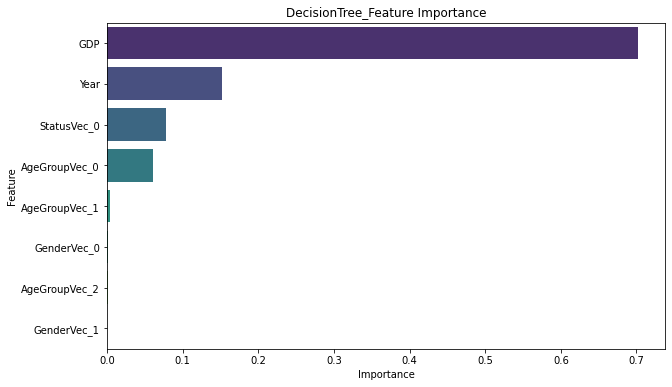

In [110]:
# Decision Tree graph


transformed_train_data = pipeline.fit(train_data).transform(train_data)

gender_vec_size = len(transformed_train_data.select("GenderVec").head()[0])
status_vec_size = len(transformed_train_data.select("StatusVec").head()[0])
agegroup_vec_size = len(transformed_train_data.select("AgeGroupVec").head()[0])


feature_names = ['Year'] + \
                [f'StatusVec_{i}' for i in range(status_vec_size)] + \
                [f'GenderVec_{i}' for i in range(gender_vec_size)] + \
                ['GDP'] + \
                [f'AgeGroupVec_{i}' for i in range(agegroup_vec_size)]


feature_importances = dt_model.stages[-1].featureImportances.toArray()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('DecisionTree_Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [111]:
# Random Forest
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')


rf = RandomForestClassifier(labelCol='Child_Mortality_Risk', featuresCol='scaledFeatures', numTrees=100)


rf_pipeline = Pipeline(stages=[gender_indexer, status_indexer, agegroup_indexer,
                            gender_encoder, status_encoder, agegroup_encoder,
                            assembler, scaler, rf])


train_data, test_data = merged_df.randomSplit([0.8, 0.2], seed=42)


rf_model = rf_pipeline.fit(train_data)

rf_predictions = rf_model.transform(test_data)

In [112]:
evaluator = MulticlassClassificationEvaluator(labelCol='Child_Mortality_Risk', metricName='accuracy')
accuracy = evaluator.evaluate(rf_predictions)
print(f"Accuracy: {accuracy}")


rf_predictions.select('Child_Mortality_Risk', 'prediction', 'probability').show()

Accuracy: 0.7088359960873818
+--------------------+----------+--------------------+
|Child_Mortality_Risk|prediction|         probability|
+--------------------+----------+--------------------+
|                   1|       1.0|[0.22436693595529...|
|                   1|       1.0|[0.21510756058012...|
|                   1|       1.0|[0.22221830586230...|
|                   1|       1.0|[0.22566898168044...|
|                   1|       1.0|[0.21723213768874...|
|                   1|       1.0|[0.22398981788705...|
|                   1|       1.0|[0.37813889456564...|
|                   1|       1.0|[0.22398981788705...|
|                   1|       1.0|[0.22817396062043...|
|                   1|       1.0|[0.22317406788494...|
|                   1|       1.0|[0.22398981788705...|
|                   1|       1.0|[0.22566898168044...|
|                   1|       1.0|[0.36792950608188...|
|                   1|       1.0|[0.21793784639940...|
|                   1|       1.0|[0.

In [113]:
rf_model = rf_model.stages[-1]  
feature_importances = rf_model.featureImportances

feature_names = assembler.getInputCols()
for feature, importance in zip(feature_names, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Year, Importance: 0.01785823396596794
Feature: StatusVec, Importance: 0.25150974434618634
Feature: GenderVec, Importance: 0.00016080329821718708
Feature: GDP, Importance: 0.00029392087857289437
Feature: AgeGroupVec, Importance: 0.6636035504790274


Accuracy: 0.7088359960873818


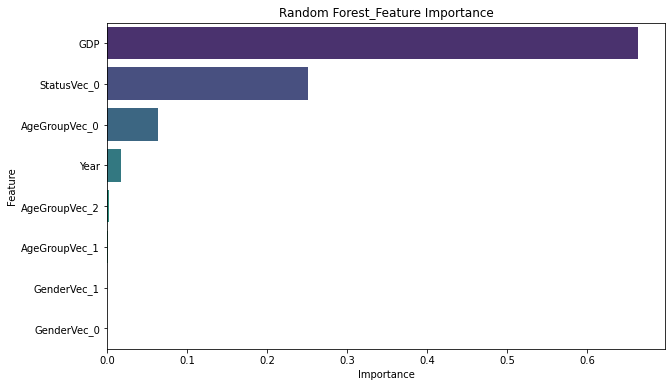

In [116]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and pipeline stages
gender_indexer = StringIndexer(inputCol='Gender', outputCol='GenderIndex')
status_indexer = StringIndexer(inputCol='Status', outputCol='StatusIndex')
agegroup_indexer = StringIndexer(inputCol='AgeGroup', outputCol='AgeGroupIndex')

gender_encoder = OneHotEncoder(inputCol='GenderIndex', outputCol='GenderVec')
status_encoder = OneHotEncoder(inputCol='StatusIndex', outputCol='StatusVec')
agegroup_encoder = OneHotEncoder(inputCol='AgeGroupIndex', outputCol='AgeGroupVec')

assembler = VectorAssembler(
    inputCols=['Year', 'StatusVec', 'GenderVec', 'GDP', 'AgeGroupVec'],
    outputCol='features'
)

scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')

rf = RandomForestClassifier(labelCol='Child_Mortality_Risk', featuresCol='scaledFeatures', numTrees=100)

rf_pipeline = Pipeline(stages=[gender_indexer, status_indexer, agegroup_indexer,
                               gender_encoder, status_encoder, agegroup_encoder, assembler, scaler, rf])

# Split the data
train_data, test_data = merged_df.randomSplit([0.8, 0.2], seed=42)

# Fit the model
rf_model = rf_pipeline.fit(train_data)

# Transform the training data to get the transformed DataFrame
transformed_train_data = rf_model.transform(train_data)

# Transform the test data
rf_predictions = rf_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='Child_Mortality_Risk', metricName='accuracy')
accuracy = evaluator.evaluate(rf_predictions)
print(f"Accuracy: {accuracy}")

# Get feature importances
rf_model_final = rf_model.stages[-1]
feature_importances = rf_model_final.featureImportances

# Get feature names from the transformed DataFrame
gender_vec_size = len(transformed_train_data.select("GenderVec").head()[0])
status_vec_size = len(transformed_train_data.select("StatusVec").head()[0])
agegroup_vec_size = len(transformed_train_data.select("AgeGroupVec").head()[0])

feature_names = ['Year'] + \
                [f'StatusVec_{i}' for i in range(status_vec_size)] + \
                [f'GenderVec_{i}' for i in range(gender_vec_size)] + \
                ['GDP'] + \
                [f'AgeGroupVec_{i}' for i in range(agegroup_vec_size)]

# Collect feature importances into a DataFrame
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances.toArray()
})

# Sort by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Random Forest_Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [114]:
# Logistic Regression

from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='Child_Mortality_Risk', featuresCol='scaledFeatures', maxIter=10)


lr_pipeline = Pipeline(stages=[gender_indexer, status_indexer, agegroup_indexer,
                            gender_encoder, status_encoder, agegroup_encoder,
                            assembler, scaler, lr])

lr_model = lr_pipeline.fit(train_data)

lr_predictions = lr_model.transform(test_data)


In [115]:
evaluator = MulticlassClassificationEvaluator(labelCol='Child_Mortality_Risk', metricName='accuracy')
lr_accuracy = evaluator.evaluate(lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy}")


lr_predictions.select('Child_Mortality_Risk', 'prediction', 'probability').show(10)


lr_stage = lr_model.stages[-1]  
coefficients = lr_stage.coefficients.toArray()

feature_names = assembler.getInputCols()
for feature, coefficient in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Logistic Regression Accuracy: 0.7083469188131725
+--------------------+----------+--------------------+
|Child_Mortality_Risk|prediction|         probability|
+--------------------+----------+--------------------+
|                   1|       1.0|[0.13037335333619...|
|                   1|       1.0|[0.14167130663508...|
|                   1|       1.0|[0.14811340919580...|
|                   1|       1.0|[0.13160972706828...|
|                   1|       1.0|[0.14948909813777...|
|                   1|       1.0|[0.17047702614411...|
|                   1|       1.0|[0.31297601794266...|
|                   1|       1.0|[0.20647846375582...|
|                   1|       1.0|[0.20449331568034...|
|                   1|       1.0|[0.21070243506048...|
+--------------------+----------+--------------------+
only showing top 10 rows

Feature: Year, Coefficient: -0.06047534400199706
Feature: StatusVec, Coefficient: 0.3806930303528708
Feature: GenderVec, Coefficient: 0.006733444251884287
